<a href="https://colab.research.google.com/github/ssp22/485Design-Project/blob/master/mass_balance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

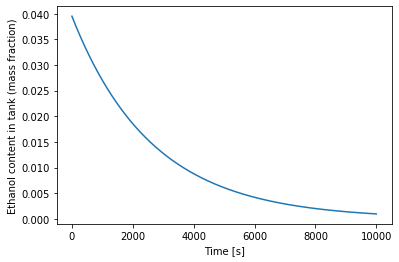

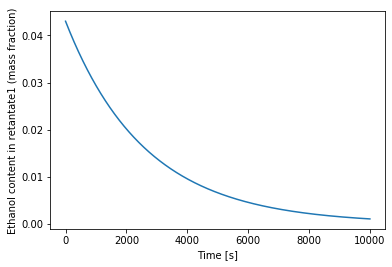

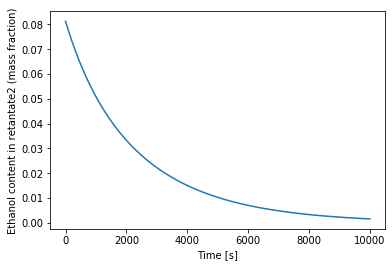

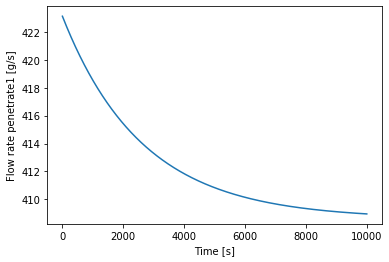

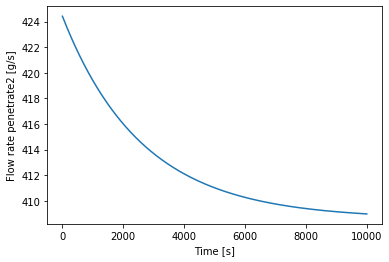

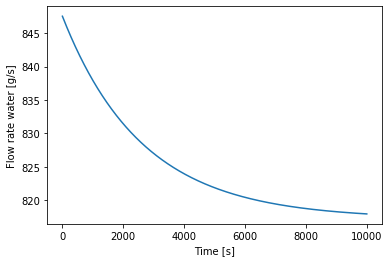

In [43]:
# Define parameters
dP = 40 # bar
dPi = 5.7 # bar
A = 953000 # cm^2 # membrane area
R = 0.1 # at 40 bar, 5C
k_w = 1.25 * 10 ** (-5) # g / (cm^2 s bar)
diff_P = dP - dPi
X = 0.01 # split ratio
# J_P_ref = 3 * 10 ** (-4) # g / cm^2 s 

# Initial conditions
m_0 = 2083000 # g # initial batch feed
C_Et0 = 0.0395 # weight percent
M_f = 900 # g / s # flow out of tank


def dCdt2(C_Et,t):
    # Define flow rates
    M_p1 = A * k_w * diff_P * (1 + C_Et * (1-R)) # 
    # M_p1 = A * J_P_ref
    M_r1 = M_f - M_p1
    if (M_r1 < 0):
      return 0
    C_r1 = (M_f * C_Et - M_p1 * (1-R) * C_Et) / M_r1
    M_p2 = A * k_w * diff_P * (1 + C_r1 * (1-R))
    # M_p2 = A * J_P_ref
    M_r2 = (1-X) * M_r1 - M_p2
    if (M_r2 < 0):
      return 0
    C_r2 = ((1-X)*M_r1*C_r1 - M_p2 * (1-R) * C_r1) / M_r2
    dCdt = (M_r1 * X * C_r1 + M_r2 * C_r2 - M_f * C_Et) / m_0
    M_water = M_p1 + M_p2
    return dCdt

t = np.linspace(0,10000,10000)

# solve ODE
C = odeint(dCdt2,C_Et0,t)

# redefine stream variables outside the ODE
M_p1 = A * k_w * diff_P * (1 + C * (1-R)) # 
M_r1 = M_f - M_p1
C_r1 = (M_f * C - M_p1 * (1-R) * C) / M_r1
M_p2 = A * k_w * diff_P * (1 + C_r1 * (1-R))
M_r2 = (1-X) * M_r1 - M_p2
C_r2 = ((1-X)*M_r1*C_r1 - M_p2 * (1-R) * C_r1) / M_r2
M_water = M_p1 + M_p2

# plot results
plt.plot(t,C)
plt.xlabel('Time [s]')
plt.ylabel('Ethanol content in tank (mass fraction)')
plt.show()

plt.plot(t,C_r1)
plt.xlabel('Time [s]')
plt.ylabel('Ethanol content in retantate1 (mass fraction)')
plt.show()

plt.plot(t,C_r2)
plt.xlabel('Time [s]')
plt.ylabel('Ethanol content in retantate2 (mass fraction)')
plt.show()

plt.plot(t,M_p1)
plt.xlabel('Time [s]')
plt.ylabel('Flow rate penetrate1 [g/s]')
plt.show()

plt.plot(t,M_p2)
plt.xlabel('Time [s]')
plt.ylabel('Flow rate penetrate2 [g/s]')
plt.show()

plt.plot(t,M_water)
plt.xlabel('Time [s]')
plt.ylabel('Flow rate water [g/s]')
plt.show()

In [50]:
# For stream table
print('initial mass flow rates (g/s): ',M_r1[0],M_r2[0],M_p1[0],M_p2[0],M_water[0])
print('endpoint mass flow rates (g/s): ',M_r1[6167],M_r2[6167],M_p1[6167],M_p2[6167],M_water[6167])

print('final mass fraction of ethanol: ',C[6167])
count = 0
val= 10
while (val >= 0.00395):
  val = C[count]
  count += 1
if (val <= 0.00395):
  Total = 0.8*365*20*3600/t[count]*m_0
  print('total product= ', Total,' g')

initial mass flow rates (g/s):  [476.87556444] [47.69353124] [423.12443556] [424.41327755] [847.53771311]
endpoint mass flow rates (g/s):  [489.9497643] [74.87855278] [410.0502357] [410.17171388] [820.22194958]
final mass fraction of ethanol:  [0.00394706]
total product=  7101623856.762895  g
